<a href="https://colab.research.google.com/github/Noob919/Feature_selection/blob/main/Models_EVALS_50%25/Cancer_50_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220527125636.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y

  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636


In [2]:
!pip install tensorflow==2.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 454.3 MB 15 kB/s 
     |████████████████████████████████| 462 kB 49.3 MB/s 
     |████████████████████████████████| 132 kB 59.1 MB/s 
     |████████████████████████████████| 1.2 MB 38.9 MB/s 
     |████████████████████████████████| 14.8 MB 40.9 MB/s 
     |████████████████████████████████| 4.0 MB 46.7 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68728 sha256=e8f72b0f493415d4d1305d3858e8c788843e32d2708693b5db01826017a5c736
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: numpy
    Found existing installation: n

In [13]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models,Sequential
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,precision_score

In [14]:
df = pd.read_csv("/content/cancer.csv")
df_new = df.drop(['id','Unnamed: 32'],axis =1)
df_new['diagnosis'] = LabelEncoder().fit_transform(df_new['diagnosis'])
y = df_new['diagnosis']

In [15]:
Scaler = StandardScaler()

In [16]:
rank1 = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "Chi_2").set_index('Attributes_Names')
df_chi = df_new[rank1[:15].index]

In [17]:
X_col =  df_chi
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 15)
Shape of testing data (114, 15)


CHI Square

Random Forest

In [18]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

Accuracy:  0.956140350877193
Recall:  0.9574468085106383
Precision:  0.9375
[[64  3]
 [ 2 45]]


SVM

In [19]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))

Accuracy:  0.9649122807017544
Recall:  0.9574468085106383
Precision:  0.9574468085106383


ANN

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu', input_shape=(15,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

In [21]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                240       
_________________________________________________________________
batch_normalization (BatchNo (None, 15)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 20)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 24)                504       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 24)                9

In [22]:
h = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
15/15 [==============================] - 2s 21ms/step - loss: 0.6337 - accuracy: 0.6418 - val_loss: 0.6202 - val_accuracy: 0.8509
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5940 - accuracy: 0.6901 - val_loss: 0.5775 - val_accuracy: 0.9386
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5139 - accuracy: 0.7692 - val_loss: 0.5366 - val_accuracy: 0.9386
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4676 - accuracy: 0.8132 - val_loss: 0.4922 - val_accuracy: 0.9298
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4247 - accuracy: 0.8264 - val_loss: 0.4460 - val_accuracy: 0.9211
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3989 - accuracy: 0.8418 - val_loss: 0.3992 - val_accuracy: 0.9298
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.3605 - accuracy: 0.8637 - val_loss: 0.3523 - val_accuracy: 0.9474
Epoch 8/100


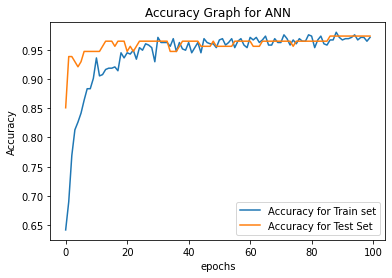

In [23]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

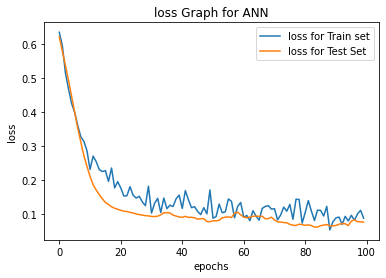

In [24]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [25]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:  0.9736842105263158
Recall:  1.0
Precision:  0.94


Tree Based Method

In [26]:
rank2  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "Tree_based_method").set_index('Attributes_Names')
df_tree = df_new[rank2[0:15].index]
X_col =  df_tree
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 15)
Shape of testing data (114, 15)


Random Forest

In [27]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))

Accuracy:  0.9736842105263158
Recall:  0.9574468085106383
Precision:  0.9782608695652174


SVM

In [28]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))

Accuracy:  0.9736842105263158
Recall:  0.9787234042553191
Precision:  0.9583333333333334


ANN

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu', input_shape=(15,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

In [30]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 15)                240       
_________________________________________________________________
batch_normalization_3 (Batch (None, 15)                60        
_________________________________________________________________
dense_6 (Dense)              (None, 20)                320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 20)                80        
_________________________________________________________________
dense_7 (Dense)              (None, 24)                504       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24)                0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 24)               

In [31]:
h = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
15/15 [==============================] - 2s 18ms/step - loss: 0.7832 - accuracy: 0.4967 - val_loss: 0.6391 - val_accuracy: 0.8246
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6654 - accuracy: 0.6198 - val_loss: 0.6116 - val_accuracy: 0.8947
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6312 - accuracy: 0.6549 - val_loss: 0.5730 - val_accuracy: 0.8947
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.5479 - accuracy: 0.7011 - val_loss: 0.5302 - val_accuracy: 0.9123
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.4941 - accuracy: 0.7648 - val_loss: 0.4831 - val_accuracy: 0.9211
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4698 - accuracy: 0.7934 - val_loss: 0.4318 - val_accuracy: 0.9211
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4183 - accuracy: 0.8242 - val_loss: 0.3815 - val_accuracy: 0.9298
Epoch 8/100


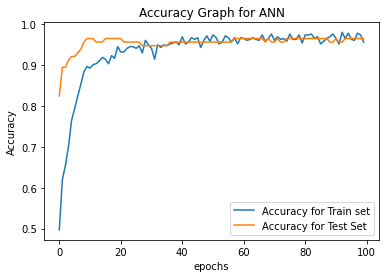

In [32]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

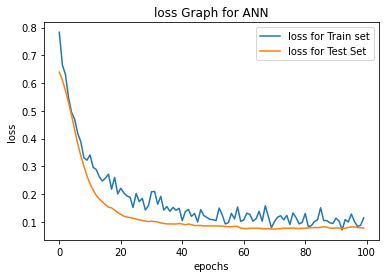

In [33]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [34]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:  0.9649122807017544
Recall:  0.9574468085106383
Precision:  0.9574468085106383


Permutation Method Mean

In [35]:
rank3  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "permutation_method_mean").set_index('Attributes_Names')
df_per_mean = df_new[rank3[0:15].index]
X_col =  df_per_mean
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 15)
Shape of testing data (114, 15)


Random Forest 

In [36]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))

Accuracy:  0.956140350877193
Recall:  0.9787234042553191
Precision:  0.92


SVM

In [37]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))

Accuracy:  0.9736842105263158
Recall:  0.9787234042553191
Precision:  0.9583333333333334


ANN

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu', input_shape=(15,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 15)                240       
_________________________________________________________________
batch_normalization_6 (Batch (None, 15)                60        
_________________________________________________________________
dense_11 (Dense)             (None, 20)                320       
_________________________________________________________________
batch_normalization_7 (Batch (None, 20)                80        
_________________________________________________________________
dense_12 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_4 (Dropout)          (None, 24)                0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 24)               

In [39]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 1s 20ms/step - loss: 0.8014 - accuracy: 0.5297 - val_loss: 0.6683 - val_accuracy: 0.6667
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: 0.7458 - accuracy: 0.5648 - val_loss: 0.6342 - val_accuracy: 0.5877
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6991 - accuracy: 0.6110 - val_loss: 0.6044 - val_accuracy: 0.5965
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6541 - accuracy: 0.6593 - val_loss: 0.5741 - val_accuracy: 0.6140
Epoch 5/50
15/15 [==============================] - 0s 5ms/step - loss: 0.5724 - accuracy: 0.7165 - val_loss: 0.5440 - val_accuracy: 0.6579
Epoch 6/50
15/15 [==============================] - 0s 6ms/step - loss: 0.5323 - accuracy: 0.7473 - val_loss: 0.5094 - val_accuracy: 0.7368
Epoch 7/50
15/15 [==============================] - 0s 5ms/step - loss: 0.4981 - accuracy: 0.7758 - val_loss: 0.4675 - val_accuracy: 0.8333
Epoch 8/50
15/15 [=

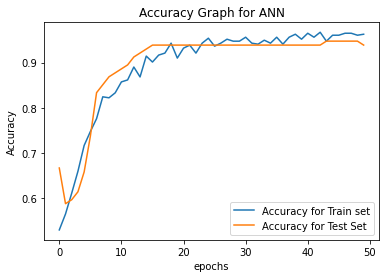

In [40]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

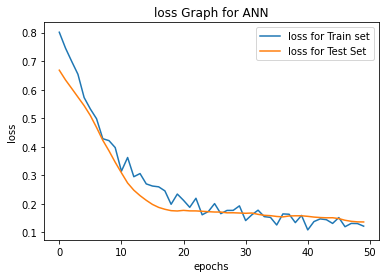

In [41]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [42]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:  0.9385964912280702
Recall:  0.9148936170212766
Precision:  0.9347826086956522


In [43]:
rank4  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "permutation_method_std").set_index('Attributes_Names')
df_per_std  = df_new[rank4[0:15].index]
X_col =  df_per_std
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 15)
Shape of testing data (114, 15)


In [44]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))

Accuracy:  0.956140350877193
Recall:  0.9787234042553191
Precision:  0.92


In [45]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))

Accuracy:  0.9736842105263158
Recall:  0.9574468085106383
Precision:  0.9782608695652174


In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu', input_shape=(15,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 15)                240       
_________________________________________________________________
batch_normalization_9 (Batch (None, 15)                60        
_________________________________________________________________
dense_16 (Dense)             (None, 20)                320       
_________________________________________________________________
batch_normalization_10 (Batc (None, 20)                80        
_________________________________________________________________
dense_17 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_6 (Dropout)          (None, 24)                0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 24)               

In [47]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 3s 30ms/step - loss: 0.7195 - accuracy: 0.5714 - val_loss: 0.6065 - val_accuracy: 0.6930
Epoch 2/50
15/15 [==============================] - 0s 9ms/step - loss: 0.6301 - accuracy: 0.6505 - val_loss: 0.5631 - val_accuracy: 0.7895
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.5351 - accuracy: 0.6945 - val_loss: 0.5227 - val_accuracy: 0.8509
Epoch 4/50
15/15 [==============================] - 0s 9ms/step - loss: 0.4974 - accuracy: 0.7451 - val_loss: 0.4840 - val_accuracy: 0.8860
Epoch 5/50
15/15 [==============================] - 0s 8ms/step - loss: 0.4947 - accuracy: 0.7802 - val_loss: 0.4460 - val_accuracy: 0.8772
Epoch 6/50
15/15 [==============================] - 0s 9ms/step - loss: 0.4384 - accuracy: 0.8176 - val_loss: 0.4095 - val_accuracy: 0.9035
Epoch 7/50
15/15 [==============================] - 0s 8ms/step - loss: 0.4016 - accuracy: 0.8088 - val_loss: 0.3718 - val_accuracy: 0.9035
Epoch 8/50
15/15 [=

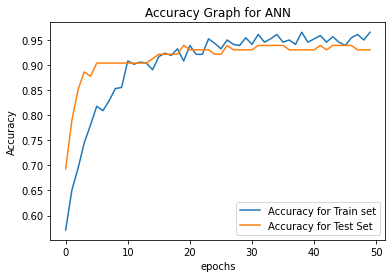

In [48]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

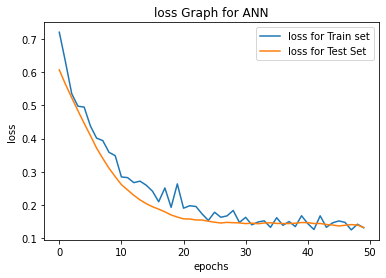

In [49]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [50]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:  0.9298245614035088
Recall:  0.9148936170212766
Precision:  0.9148936170212766


In [51]:
rank5  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "PCA").set_index('Attributes_Names')
df_pca  = df_new[rank5[:15].index]
X_col =  df_pca
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 15)
Shape of testing data (114, 15)


In [52]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))

Accuracy:  0.9649122807017544
Recall:  0.9574468085106383
Precision:  0.9574468085106383


In [53]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))

Accuracy:  0.9649122807017544
Recall:  0.9574468085106383
Precision:  0.9574468085106383


In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu', input_shape=(15,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 15)                240       
_________________________________________________________________
batch_normalization_12 (Batc (None, 15)                60        
_________________________________________________________________
dense_21 (Dense)             (None, 20)                320       
_________________________________________________________________
batch_normalization_13 (Batc (None, 20)                80        
_________________________________________________________________
dense_22 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_8 (Dropout)          (None, 24)                0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 24)               

In [55]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 3s 30ms/step - loss: 0.9567 - accuracy: 0.4022 - val_loss: 0.6823 - val_accuracy: 0.5965
Epoch 2/50
15/15 [==============================] - 0s 9ms/step - loss: 0.8155 - accuracy: 0.4615 - val_loss: 0.6523 - val_accuracy: 0.8070
Epoch 3/50
15/15 [==============================] - 0s 9ms/step - loss: 0.6621 - accuracy: 0.6066 - val_loss: 0.6142 - val_accuracy: 0.8421
Epoch 4/50
15/15 [==============================] - 0s 9ms/step - loss: 0.6161 - accuracy: 0.6593 - val_loss: 0.5687 - val_accuracy: 0.8772
Epoch 5/50
15/15 [==============================] - 0s 9ms/step - loss: 0.5849 - accuracy: 0.6945 - val_loss: 0.5189 - val_accuracy: 0.9123
Epoch 6/50
15/15 [==============================] - 0s 9ms/step - loss: 0.5215 - accuracy: 0.7121 - val_loss: 0.4608 - val_accuracy: 0.9298
Epoch 7/50
15/15 [==============================] - 0s 8ms/step - loss: 0.4801 - accuracy: 0.7846 - val_loss: 0.4047 - val_accuracy: 0.9298
Epoch 8/50
15/15 [=

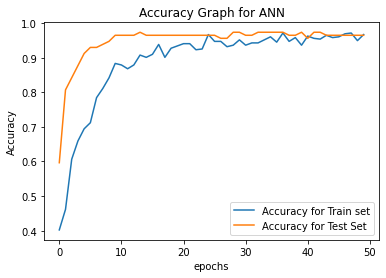

In [56]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

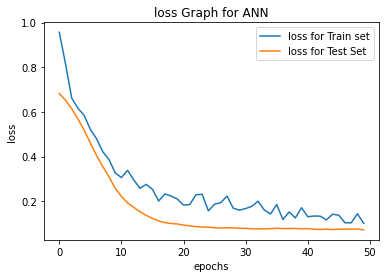

In [57]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [58]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:  0.9649122807017544
Recall:  1.0
Precision:  0.9215686274509803


In [59]:
rank6  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "F_test").set_index('Attributes_Names')
df_f_test  = df_new[rank6[:15].index]
X_col =  df_f_test
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 15)
Shape of testing data (114, 15)


In [61]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))

Accuracy:  0.9385964912280702
Recall:  0.9361702127659575
Precision:  0.9166666666666666


In [62]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))

Accuracy:  0.9385964912280702
Recall:  0.9148936170212766
Precision:  0.9347826086956522


In [63]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu', input_shape=(15,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 15)                240       
_________________________________________________________________
batch_normalization_15 (Batc (None, 15)                60        
_________________________________________________________________
dense_26 (Dense)             (None, 20)                320       
_________________________________________________________________
batch_normalization_16 (Batc (None, 20)                80        
_________________________________________________________________
dense_27 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_10 (Dropout)         (None, 24)                0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 24)               

In [64]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 2s 18ms/step - loss: 0.8195 - accuracy: 0.5209 - val_loss: 0.6320 - val_accuracy: 0.7544
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: 0.7047 - accuracy: 0.5868 - val_loss: 0.5851 - val_accuracy: 0.9035
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6154 - accuracy: 0.6967 - val_loss: 0.5374 - val_accuracy: 0.8860
Epoch 4/50
15/15 [==============================] - 0s 5ms/step - loss: 0.5814 - accuracy: 0.6879 - val_loss: 0.4998 - val_accuracy: 0.8684
Epoch 5/50
15/15 [==============================] - 0s 5ms/step - loss: 0.4940 - accuracy: 0.7363 - val_loss: 0.4586 - val_accuracy: 0.8772
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4524 - accuracy: 0.8242 - val_loss: 0.4173 - val_accuracy: 0.8860
Epoch 7/50
15/15 [==============================] - 0s 6ms/step - loss: 0.3932 - accuracy: 0.8374 - val_loss: 0.3787 - val_accuracy: 0.9035
Epoch 8/50
15/15 [=

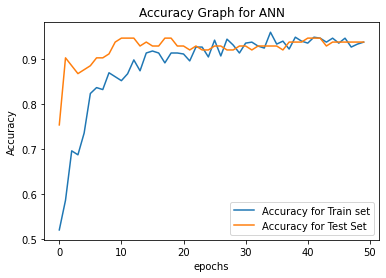

In [65]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

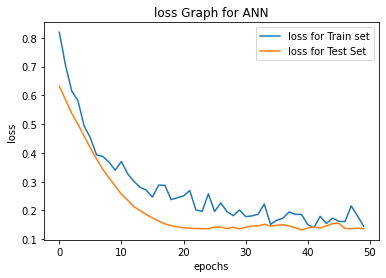

In [66]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [67]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:  0.9385964912280702
Recall:  0.9148936170212766
Precision:  0.9347826086956522


In [68]:
rank7  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "mutual_info").set_index('Attributes_Names')
df_mutual = df_new[rank7[:15].index]
X_col =  df_mutual
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 15)
Shape of testing data (114, 15)


In [69]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))

Accuracy:  0.9385964912280702
Recall:  0.9361702127659575
Precision:  0.9166666666666666


In [70]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))

Accuracy:  0.9385964912280702
Recall:  0.9148936170212766
Precision:  0.9347826086956522


In [71]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu', input_shape=(15,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 15)                240       
_________________________________________________________________
batch_normalization_18 (Batc (None, 15)                60        
_________________________________________________________________
dense_31 (Dense)             (None, 20)                320       
_________________________________________________________________
batch_normalization_19 (Batc (None, 20)                80        
_________________________________________________________________
dense_32 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_12 (Dropout)         (None, 24)                0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 24)               

In [72]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 2s 68ms/step - loss: 0.7151 - accuracy: 0.5297 - val_loss: 0.5931 - val_accuracy: 0.8421
Epoch 2/50
15/15 [==============================] - 0s 6ms/step - loss: 0.5637 - accuracy: 0.6945 - val_loss: 0.5435 - val_accuracy: 0.9386
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.4950 - accuracy: 0.7604 - val_loss: 0.4825 - val_accuracy: 0.9123
Epoch 4/50
15/15 [==============================] - 0s 6ms/step - loss: 0.4309 - accuracy: 0.8022 - val_loss: 0.4310 - val_accuracy: 0.9211
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.3743 - accuracy: 0.8571 - val_loss: 0.3897 - val_accuracy: 0.9211
Epoch 6/50
15/15 [==============================] - 0s 6ms/step - loss: 0.3362 - accuracy: 0.8725 - val_loss: 0.3486 - val_accuracy: 0.9211
Epoch 7/50
15/15 [==============================] - 0s 6ms/step - loss: 0.3276 - accuracy: 0.8703 - val_loss: 0.3186 - val_accuracy: 0.9211
Epoch 8/50
15/15 [=

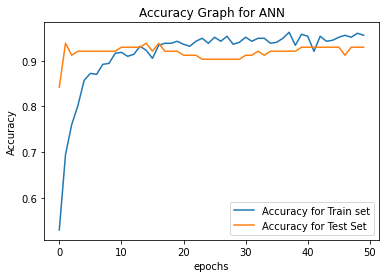

In [73]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

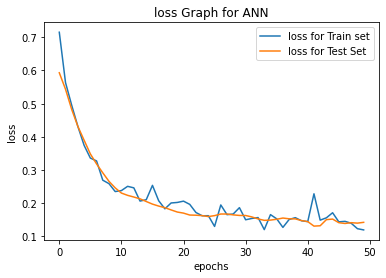

In [74]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [75]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:  0.9298245614035088
Recall:  0.9574468085106383
Precision:  0.8823529411764706


In [76]:
rank8  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "Pearson_Correlation").set_index('Attributes_Names')
df_pearson =  df_new[rank8[:15].index]
X_col =  df_pearson
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 15)
Shape of testing data (114, 15)


In [77]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))

Accuracy:  0.9473684210526315
Recall:  0.9361702127659575
Precision:  0.9361702127659575


In [78]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))

Accuracy:  0.9385964912280702
Recall:  0.9148936170212766
Precision:  0.9347826086956522


In [79]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu', input_shape=(15,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 15)                240       
_________________________________________________________________
batch_normalization_21 (Batc (None, 15)                60        
_________________________________________________________________
dense_36 (Dense)             (None, 20)                320       
_________________________________________________________________
batch_normalization_22 (Batc (None, 20)                80        
_________________________________________________________________
dense_37 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_14 (Dropout)         (None, 24)                0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 24)               

In [80]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 1s 18ms/step - loss: 0.7905 - accuracy: 0.6022 - val_loss: 0.6848 - val_accuracy: 0.6140
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6715 - accuracy: 0.6484 - val_loss: 0.6226 - val_accuracy: 0.7895
Epoch 3/50
15/15 [==============================] - 0s 5ms/step - loss: 0.5358 - accuracy: 0.7055 - val_loss: 0.5739 - val_accuracy: 0.9211
Epoch 4/50
15/15 [==============================] - 0s 5ms/step - loss: 0.4811 - accuracy: 0.7670 - val_loss: 0.5268 - val_accuracy: 0.9211
Epoch 5/50
15/15 [==============================] - 0s 5ms/step - loss: 0.4769 - accuracy: 0.7868 - val_loss: 0.4773 - val_accuracy: 0.9123
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 0.3992 - accuracy: 0.8176 - val_loss: 0.4330 - val_accuracy: 0.9123
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4070 - accuracy: 0.8220 - val_loss: 0.3900 - val_accuracy: 0.9211
Epoch 8/50
15/15 [=

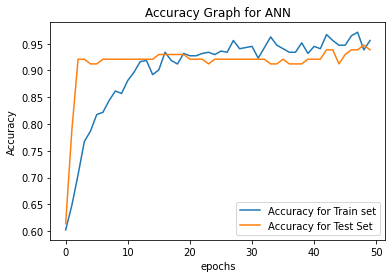

In [81]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

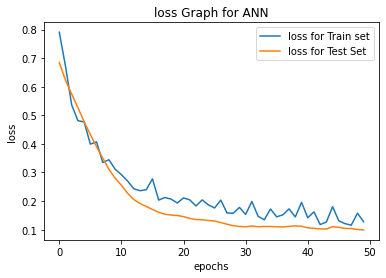

In [82]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [83]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:  0.9385964912280702
Recall:  0.9574468085106383
Precision:  0.9


OWA

In [84]:
OWA =  rank8  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "OWA_method").set_index('Attributes_Name')

In [85]:
df_owa  = df_new[OWA[:15].index]

In [86]:
X_col =  df_owa
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 15)
Shape of testing data (114, 15)


In [92]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
pred =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,pred))
print("Recall: ", recall_score(y_test,pred))
print("Precision: ", precision_score(y_test,pred))

Accuracy:  0.956140350877193
Recall:  0.9574468085106383
Precision:  0.9375


In [99]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("Precision: ", precision_score(y_test,y_pred))

Accuracy:  0.9649122807017544
Recall:  0.9574468085106383
Precision:  0.9574468085106383


In [94]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation='relu', input_shape=(15,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 15)                240       
_________________________________________________________________
batch_normalization_24 (Batc (None, 15)                60        
_________________________________________________________________
dense_41 (Dense)             (None, 20)                320       
_________________________________________________________________
batch_normalization_25 (Batc (None, 20)                80        
_________________________________________________________________
dense_42 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_16 (Dropout)         (None, 24)                0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 24)               

In [95]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 1s 17ms/step - loss: 0.8743 - accuracy: 0.5011 - val_loss: 0.6815 - val_accuracy: 0.6228
Epoch 2/50
15/15 [==============================] - 0s 5ms/step - loss: 0.7393 - accuracy: 0.5868 - val_loss: 0.6473 - val_accuracy: 0.7895
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 0.6083 - accuracy: 0.6637 - val_loss: 0.6154 - val_accuracy: 0.8421
Epoch 4/50
15/15 [==============================] - 0s 5ms/step - loss: 0.5520 - accuracy: 0.7209 - val_loss: 0.5759 - val_accuracy: 0.8421
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4974 - accuracy: 0.7802 - val_loss: 0.5320 - val_accuracy: 0.8421
Epoch 6/50
15/15 [==============================] - 0s 6ms/step - loss: 0.4540 - accuracy: 0.8088 - val_loss: 0.4857 - val_accuracy: 0.8509
Epoch 7/50
15/15 [==============================] - 0s 5ms/step - loss: 0.4243 - accuracy: 0.8154 - val_loss: 0.4378 - val_accuracy: 0.8596
Epoch 8/50
15/15 [=

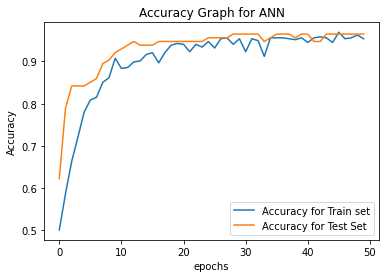

In [96]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

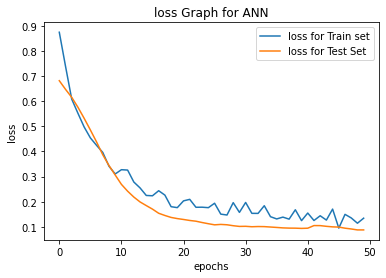

In [97]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [98]:
y_pred_ann_owa = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann_owa))
print("Recall: ", recall_score(y_test,y_pred_ann_owa))
print("Precision: ", precision_score(y_test,y_pred_ann_owa))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:  0.9649122807017544
Recall:  0.9574468085106383
Precision:  0.9574468085106383
